In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import os
import logging

import matplotlib.pyplot as plt
import numpy as np

import yass
from yass import preprocess
from yass import process
from yass import deconvolution

In [9]:
# configure logging module to get useful information
logging.basicConfig(level=logging.CRITICAL)

# set yass configuration parameters
yass.set_config('../config/threshold100k.yaml')

cfg = yass.read_config()

# Preprocessor

In [38]:
! pwd

/Users/Edu/dev/grossman/yass-private/notebooks


In [76]:
# run preprocessor
score, clr_idx, spt = preprocess.run()

INFO:yass.batch.batch:Number of batches: 1. Batch size: 100000 (observations  per channel. Residual: 0. Total number of observations 100000
INFO:yass.preprocess.run:Initialized butterworth batch processor: BatchProcessor for file /users/Edu/data/yass/sample_100k.bin (1400000 bytes). Already processed 0 out of 1 batches. Max memory: 1000000000 bytes
DEBUG:yass.batch.batch:Loading batch 1...
DEBUG:yass.batch.batch:Closing file...
INFO:yass.batch.batch:Number of batches: 1. Batch size: 100120 (observations  per channel. Residual: 0. Total number of observations 100120
DEBUG:yass.batch.batch:Loading batch 1...
INFO:yass.batch.batch:Number of batches: 1. Batch size: 100120 (observations  per channel. Residual: 0. Total number of observations 100120
INFO:yass.preprocess.run:Initialized standarization batch processor: BatchProcessor for file /users/Edu/data/yass/tmp/filtered.bin (5606720 bytes). Already processed 0 out of 1 batches. Max memory: 1000000000 bytes
DEBUG:yass.batch.batch:Loading 

('1 batch added', 60, '/users/Edu/data/yass/sample_100k.bin')
('1 batch added', 0, '/users/Edu/data/yass/tmp/filtered.bin')
('1 batch added', 0, '/users/Edu/data/yass/tmp/filtered.bin')
('1 batch added', 0, '/users/Edu/data/yass/tmp/standarized.bin')
('writing', (700840,), dtype('int16'), <open file '/users/Edu/data/yass/tmp/whiten.bin', mode 'wb' at 0x116f2fd20>, 1401680, 2)
('chunk size in bytes is', 1401680)
closing...
('flattenedLength', 100120, 7)
('size of file', 1401680)
/users/Edu/data/yass/tmp/whiten.bin
('seek', 0)
('read', 1401680)
('wf_file read', 1401680)
('wf_file read int 16', (700840,))
('rec has length', 100120)


In [5]:
score[1]

array([[[  2.42638847e-01,  -1.75553538e+00,   3.17991618e-01,
          -1.34329470e-01],
        [  1.12133070e+00,   6.20974243e+00,   1.31035218e+00,
           1.51575526e+00],
        [  4.54978199e-01,   9.70906731e+00,  -1.70826246e+00,
           2.61737889e+00]],

       [[ -3.47706851e+00,  -2.12739440e+00,   9.27645969e-01,
           6.45634603e-01],
        [  9.57698473e+00,   6.44587424e+00,  -3.18209315e+00,
           7.61804278e+00],
        [  9.69160813e+00,   1.40194208e+01,  -8.87585199e-01,
           3.58617438e+00]],

       [[ -2.89280022e+00,  -7.62221039e-01,   2.79424312e+00,
           6.22728040e-01],
        [  1.06762333e+01,   7.89723465e+00,  -1.94693734e+00,
           8.20247291e+00],
        [  9.37948095e+00,   1.39365489e+01,  -2.56505491e+00,
           4.27434402e+00]],

       [[ -4.10154164e+00,  -1.32514165e+00,   1.63858563e+00,
           3.04578401e+00],
        [  4.04333936e+00,   3.90887423e+00,   3.52944568e+00,
          -1.82275126

In [6]:
[s.shape for s in score]

[(24, 3, 7),
 (72, 3, 4),
 (14, 3, 4),
 (19, 3, 4),
 (140, 3, 4),
 (110, 3, 4),
 (164, 3, 4)]

In [7]:
[c.shape for c in clr_idx]

[(24,), (72,), (14,), (19,), (140,), (110,), (164,)]

In [8]:
clr_idx[0]

array([ 15,  24,  29,  31,  39,  64, 104, 105, 110, 111, 119, 123, 144,
       158, 163, 175, 177, 182, 222, 252, 265, 290, 305, 307])

In [9]:
[s.shape for s in spt]

[(309, 2), (1445, 2), (894, 2), (945, 2), (1258, 2), (975, 2), (950, 2)]

In [10]:
spt[0][24]

array([6952,    0], dtype=int32)

# Processor

In [85]:
# run processor
spike_train, spt_left, templates = process.run(score, clr_idx, spt)

INFO:yass.process.run:Triaging...
INFO:yass.process.run:Coresettting...
INFO:yass.process.run:Masking...
INFO:yass.process.run:Clustering...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.process.run:Getting Templates...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.process.run:Mainprocess done in 0 seconds.
INFO:yass.process.run:	triage:	0.006366 seconds
INFO:yass.process.run:	coreset:	0.096526 seconds
INFO:yass.process.run:	masking:	0.005329 seconds
INFO:yass.process.run:	clustering:	0.40703 seconds
INFO:yass.process.run:	make templates:	0.03532 seconds


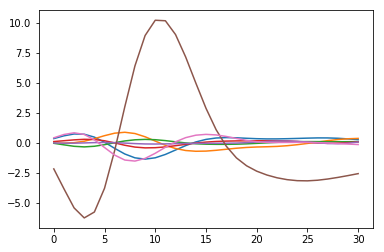

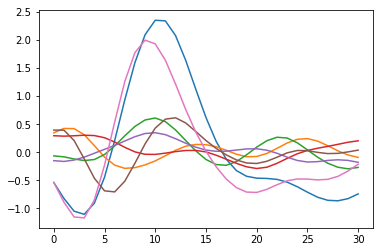

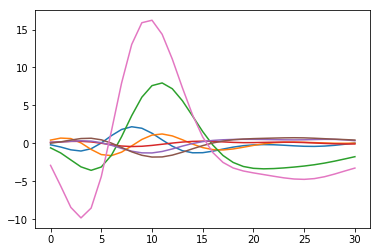

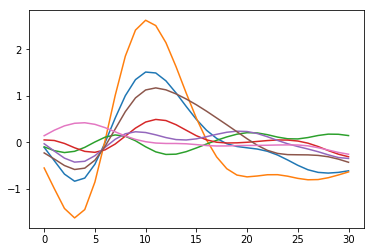

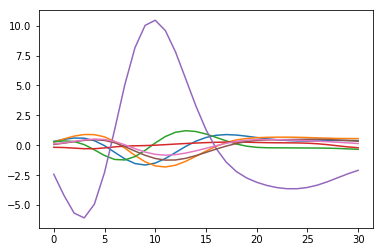

In [12]:
for t in np.transpose(templates,[2,1,0]):
    plt.plot(t)
    plt.show()



In [13]:
templates.shape

(7, 31, 5)

In [14]:
spike_train.shape

(449, 2)

In [15]:
[s.shape for s in spt_left]

[(290, 2), (1381, 2), (887, 2), (931, 2), (1145, 2), (882, 2), (811, 2)]

In [16]:
templates.shape

(7, 31, 5)

In [17]:
from yass.mainprocess import Mainprocessor
mp = Mainprocessor(cfg, score, clr_idx, spt)
_, _ = mp.mainProcess()

100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


In [18]:
d = deconvolution.Deconvolution(cfg,
                                np.transpose(templates,[1,0,2]), spt_left)



In [19]:
spike_times_col = d.fullMPMU()

100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


Deconvoltuion done in 0 seconds.


In [20]:
spike_times_col.shape

(653, 2)

In [21]:
whiten = np.fromfile(os.path.join(cfg.root, 'tmp/whiten.bin'),
                   dtype='int16')
whiten = whiten.reshape((100120, 7))

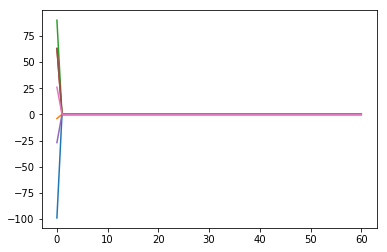

In [38]:
for t in whiten.T:
    plt.plot(t[-61:])

plt.show()

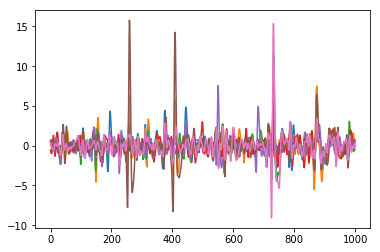

In [34]:
standarized = np.fromfile(os.path.join(cfg.root, 'tmp/standarized.bin'),
                   dtype='float').reshape((100000, 7))

for s in standarized.T:
    plt.plot(s[-1000:])

plt.show()

In [26]:
raw = np.fromfile(os.path.join(cfg.root, 'tmp/sample_100k.bin'),
                   dtype='int16').reshape((100000, 7))
for s in raw.T:
    plt.plot(s[:100])

plt.show()

IOError: [Errno 2] No such file or directory: '/users/Edu/data/yass/tmp/sample_100k.bin'

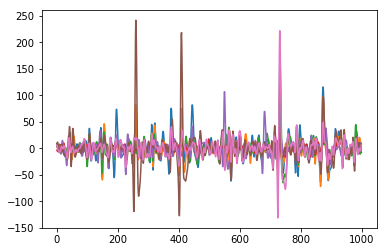

In [35]:
filtered = np.fromfile(os.path.join(cfg.root, 'tmp/filtered.bin'),
                   dtype='float').reshape((100000, 7))
for s in filtered.T:
    plt.plot(s[-1000:])

plt.show()

In [77]:
from yass import deconvolution

In [87]:
spikes_deconv = deconvolution.run(templates, spt_left)

DEBUG:yass.deconvolution:wfile is /users/Edu/data/yass/tmp/wrec.bin 1401680
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


Deconvoltuion done in 0 seconds.


In [83]:
spikes.shape

(113, 2)

In [88]:
spikes_all = np.concatenate((spikes_deconv, spike_train))

idx_sort = np.argsort(spikes_all[:, 0])
spikes_all = spikes_all[idx_sort]

idx_keep = np.zeros(spikes_all.shape[0],'bool')

for k in range(templates.shape[2]):
    idx_c = np.where(spikes_all[:,1] == k)[0]
    idx_keep[idx_c[np.concatenate(([True], np.diff(spikes_all[idx_c,0]) > 1))]] = 1

spikes_all = spikes_all[idx_keep]

In [90]:
spikes_all.shape

(656, 2)

In [91]:
spikes_deconv.shape, spike_train.shape

((130, 2), (526, 2))